# Dungeons and Dragons

In the Dungeons and Dragons game, there are a couple of central
features that are important to the game. One of these that dice 
with different numbers of sides are used to determine the outcome
of certain events. For example, a 20-sided die is used to determine
if an attack is successful. If the number rolled is greater than
or equal to the armor class of the target, the attack is successful.

Another feature of the game is that there are situations where a
player must roll the die multiple times and take the highest value.

This program will simulate the rolling of dice with different numbers
of sides and the rolling of multiple dice and taking the highest value.


In [2]:
# Import the random module
import random

# Import numpy, matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define a function that simulates rolling a die with n sides
def roll_die(n):
    return random.randint(1,n)

Average of 1 roll:  10.49484
Theoretical average:  10.5


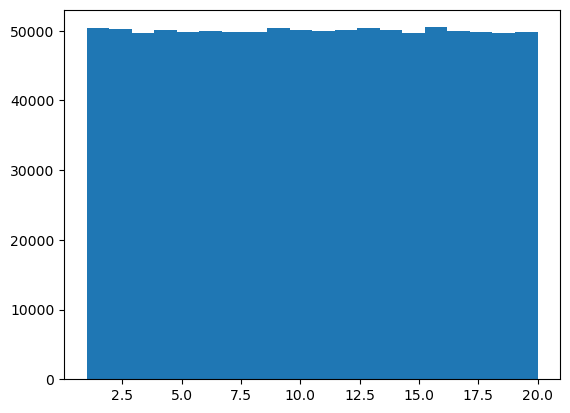

In [4]:
# Define some parameters
num_sides = 20
num_rolls = 1000000

# Roll the die num_rolls times and store the results in a list
rolls = []
for i in range(num_rolls):
    rolls.append(roll_die(num_sides))
    
# Plot a histogram of the results
plt.hist(rolls, bins=num_sides)

# Calculate the average
total = 0
avg_1roll = np.mean(rolls)
print("Average of 1 roll: ", avg_1roll)

# Calculate the theory average value
avg_theory = (num_sides + 1) / 2
print("Theoretical average: ", avg_theory)

In [5]:
# Define a function that rolls n dice with m sides and returns the highest value

def roll_dice(n, m):
    rolls = []
    for i in range(n):
        rolls.append(roll_die(m))
    return max(rolls)

Average of 2 rolls: 13.818738


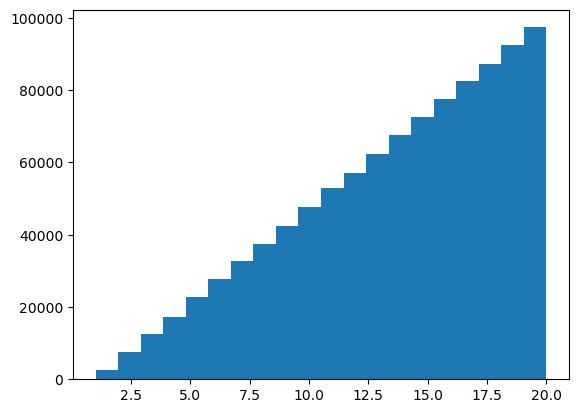

In [6]:
# Define some parameters
num_dice = 2
num_sides = 20
num_rolls = 1000000

# Roll the dice num_rolls times and store the results in a list
rolls = []
for i in range(num_rolls):
    rolls.append(roll_dice(num_dice, num_sides))

# Plot a histogram of the results
plt.hist(rolls, bins=num_sides)

# Calculate the average
total = 0
avg_mrolls = np.mean(rolls)
print("Average of %d rolls: %f" % (num_dice,avg_mrolls))

# Theory

The average value of a single roll of a die with n sides is given by

$$\frac{n+1}{2}$$

The probability of rolling a value of i on a single die is given by

$$p_i = \frac{1}{n}$$

The probability of rolling i or less on a single die is given by

$$P_i = \sum_{j=1}^{i} p_j = \sum_{j=1}^{i} \frac{1}{n} = \frac{i}{n}$$

Thus, the probability of rolling greater than i on a single die is given by

$$P_i^c = 1 - P_i = 1 - \frac{i}{n} = \frac{n-i}{n}$$

The probability of rolling greater than i on m dice is given by

$$P_i^c = \left( \frac{n-i}{n} \right)^m$$

The probability of rolling i or less on m dice is given by

$$P_i = 1 - P_i^c = 1 - \left( \frac{n-i}{n} \right)^m$$

And finally, the probability of rolling exactly i on m dice is given by

$$p_i = P_i - P_{i-1} = \left( 1 - \left( \frac{n-i}{n} \right)^m \right) - \left( 1 - \left( \frac{n-(i-1)}{n} \right)^m \right) = \left( \frac{i}{n} \right)^m - \left( \frac{i-1}{n} \right)^m$$


The average value of the highest of m rolls of a die with n sides is given by

$$\sum_{i=1}^{n} i \left( \left( \frac{i}{n} \right)^m - \left( \frac{i-1}{n} \right)^m \right)$$

Looking at the limit as n goes to infinity, we can see that the average value of the highest of m rolls of a die with n sides is given by

$$\lim_{n \to \infty} \sum_{i=1}^{n} i \left( \left( \frac{i}{n} \right)^m - \left( \frac{i-1}{n} \right)^m \right) = \int_{0}^{1} x \left( x^m - (x-1)^m \right) dx = \frac{m}{m+1}$$





Theoretical average:  15.4875


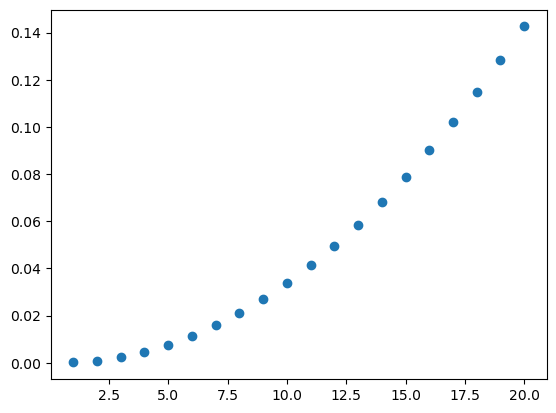

In [7]:
# Define a function that calculates the roll probabilities for m dice with n sides

def roll_prob(n, m):
    probs = []
    for i in range(1, n+1):
        probs.append((i/n)**m - ((i-1)/n)**m)
    return probs

def avg_roll(n, m):
    probs = roll_prob(n, m)
    avg = 0
    for i in range(1, n+1):
        avg += i * probs[i-1]
    return avg

num_sides = 20
num_dice = 3

# Calculate the theoretical probabilities
probs = roll_prob(num_sides, num_dice)

# Plot the theoretical probabilities
plt.plot(range(1, num_sides+1), probs, 'o')

# Calculate the theoretical average
avg_theory = avg_roll(num_sides, num_dice)

# Print the theoretical average
print("Theoretical average: ", avg_theory)

Average of 1 rolls: 10.500000
Average of 2 rolls: 13.825000
Average of 3 rolls: 15.487500
Average of 4 rolls: 16.483338
Average of 5 rolls: 17.145844
Average of 6 rolls: 17.617878
Average of 7 rolls: 17.970870
Average of 8 rolls: 18.244503
Average of 9 rolls: 18.462587
Average of 10 rolls: 18.640276


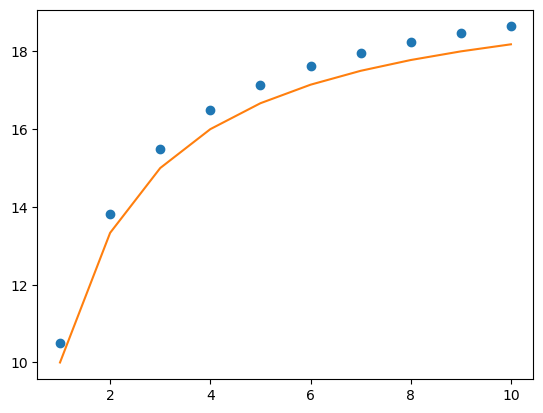

In [8]:
# Let's look at the average as a function of the number of dice

num_sides = 20

avg = []
for num_dice in range(1, 11):
    avg.append(avg_roll(num_sides, num_dice))
    print("Average of %d rolls: %f" % (num_dice, avg[num_dice-1]))
    
plt.plot(range(1, 11), avg, 'o')
theory = []
for i in range(1, 11):
    theory.append(i/(i+1)*(num_sides))
plt.plot(range(1, 11), theory, '-')

Average of 1 dice with 1 sides: 1.000000
Average of 1 dice with 2 sides: 1.500000
Average of 1 dice with 3 sides: 2.000000
Average of 1 dice with 4 sides: 2.500000
Average of 1 dice with 5 sides: 3.000000
Average of 1 dice with 6 sides: 3.500000
Average of 1 dice with 7 sides: 4.000000
Average of 1 dice with 8 sides: 4.500000
Average of 1 dice with 9 sides: 5.000000
Average of 1 dice with 10 sides: 5.500000
Average of 1 dice with 11 sides: 6.000000
Average of 1 dice with 12 sides: 6.500000
Average of 1 dice with 13 sides: 7.000000
Average of 1 dice with 14 sides: 7.500000
Average of 1 dice with 15 sides: 8.000000
Average of 1 dice with 16 sides: 8.500000
Average of 1 dice with 17 sides: 9.000000
Average of 1 dice with 18 sides: 9.500000
Average of 1 dice with 19 sides: 10.000000
Average of 1 dice with 20 sides: 10.500000
Average of 2 dice with 1 sides: 1.000000
Average of 2 dice with 2 sides: 1.750000
Average of 2 dice with 3 sides: 2.444444
Average of 2 dice with 4 sides: 3.125000
Ave

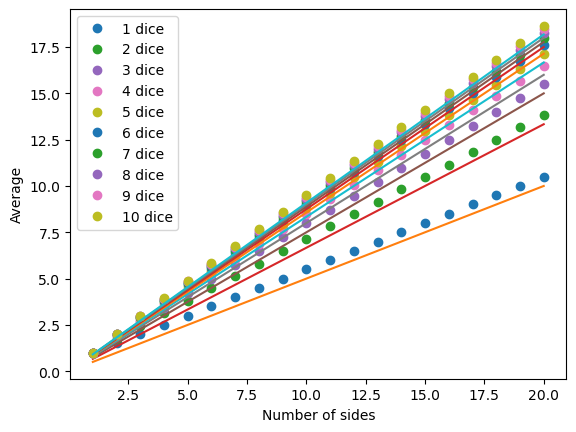

In [9]:
# Let's look at the average as a function of the number of sides

avg = np.zeros((20, 10))

for num_dice in range(1, 11):
    for num_sides in range(1, 21):
        avg[num_sides-1][num_dice-1] = avg_roll(num_sides, num_dice)
        print("Average of %d dice with %d sides: %f" % (num_dice, num_sides, avg[num_sides-1][num_dice-1]))
    
    plt.plot(range(1, 21), avg[:,num_dice-1], 'o', label=str(num_dice)+" dice")
    theory = []
    for i in range(1, 21):
        theory.append(num_dice/(num_dice+1)*(i))
    plt.plot(range(1, 21), theory, '-')
   
plt.xlabel("Number of sides")
plt.ylabel("Average")
plt.legend()